In [1]:
import pandas as pd
import joblib as job
import pickle as pk
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.externals import joblib 
from sklearn.metrics import accuracy_score
import warnings

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer

from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten ,LSTM ,  SimpleRNN
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras import *

warnings.filterwarnings("ignore",category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Dataset/train.csv'
r = 0.3

def Split(path,r):
  Data = pd.read_csv(path)
  Data.columns = ['Sentence', 'Tag']
  Data['Tag'] = pd.to_numeric(Data['Tag'])
  Data['Sentence'] = Data['Sentence'].astype(str)
  X = Data['Sentence']
  Y = Data['Tag'] 
  print(len(X))
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=r,random_state =43, shuffle=True) 
  return Xtrain, Xtest, Ytrain, Ytest

Xtrain, Xtest, Ytrain, Ytest = train_test_split =  Split(path,r) 

1000


In [3]:
print('Xtrain shape :',Xtrain.shape)
print('Ytrain shape :',Ytrain.shape)
print('Xtest shape :',Xtest.shape)
print('Ytest shape :',Ytest.shape)

Xtrain shape : (700,)
Ytrain shape : (700,)
Xtest shape : (300,)
Ytest shape : (300,)


In [3]:
# Text preprocessing

def RemovePun(Xtrain, Xtest):
  punc = '''!'"\,<()-[]%^&*{};:>./?@#$_~'''
  
  for i in range(len(Xtrain)):
    s1 = Xtrain.iloc[i]
    s2 = ""
    for j in s1:
      if j not in punc:
        s2 = s2+j
    Xtrain.iloc[i] = s2

  for i in range(len(Xtest)):
    s1 = Xtest.iloc[i]
    s2 = ""
    for j in s1:
      if j not in punc:
        s2 = s2+j
    Xtest.iloc[i] = s2  
  
  return Xtrain, Xtest

Xtrain, Xtest = RemovePun(Xtrain, Xtest)

print('\nAfter removing Puncutation,  4 lines of Training Set :\n')
for i in Xtrain[100:104]:
  print(i.split(' ')) 

def LowerCaseWords(Xtrain, Xtest):
  
  for i in range(len(Xtrain)):
    Xtrain.iloc[i] = Xtrain.iloc[i].lower()
 
  for i in range(len(Xtest)):
    Xtest.iloc[i] = Xtest.iloc[i].lower()
  
  return Xtrain, Xtest

Xtrain, Xtest = LowerCaseWords(Xtrain, Xtest)

print('\nAfter lower case , 4 lines of Training Set :\n')
for i in Xtrain[100:104]:
  print(i.split(' ')) 


def RemoveStopWords(Xtrain, Xtest):
  
  stopw = stopwords.words('english')
  NewXtrain =[]
  NewXtest =[]

  for i in range(len(Xtrain)):
    temp = []
    for j in (word_tokenize(Xtrain.iloc[i])): 
      if j not in stopw:
        temp.append(j)
    NewXtrain.append(temp)

  for i in range(len(Xtest)):
    temp = []
    for j in (word_tokenize(Xtest.iloc[i])): 
      if j not in stopw:
        temp.append(j)
    NewXtest.append(temp)

  return NewXtrain ,NewXtest

Xtrain, Xtest =  RemoveStopWords(Xtrain, Xtest)

print('\nAfter removing stopwords , 4 lines of Training Set :\n')
for i in Xtrain[100:104]:
  print(i) 

def PortStem(Xtrain, Xtest):
  
  stem = PorterStemmer()
  NewXtrain =[]
  NewXtest =[]

  for i in range(len(Xtrain)):
    sent = list(Xtrain[i])
    temp = []
    for s in sent:
      temp.append(stem.stem(s))           
    NewXtrain.append(temp)

  for i in range(len(Xtest)):
    sent = list(Xtest[i])
    temp = []
    for s in sent:
      temp.append(stem.stem(s))           
    NewXtest.append(temp)
  
  return NewXtrain ,NewXtest

Xtrain, Xtest =  PortStem(Xtrain, Xtest)

print('\nAfter stemming , 4 lines of Training Set :\n')
for i in Xtrain[100:104]:
  print(i) 


After removing Puncutation,  4 lines of Training Set :

['Heres', 'where', 'the', 'movie', 'really', 'pied', 'me', 'off']
['The', 'script', 'is\x85was', 'there', 'a', 'script']
['This', 'film', 'has', 'no', 'redeeming', 'features']
['The', 'death', 'row', 'scenes', 'were', 'entirely', 'unmoving']

After lower case , 4 lines of Training Set :

['heres', 'where', 'the', 'movie', 'really', 'pied', 'me', 'off']
['the', 'script', 'is\x85was', 'there', 'a', 'script']
['this', 'film', 'has', 'no', 'redeeming', 'features']
['the', 'death', 'row', 'scenes', 'were', 'entirely', 'unmoving']

After removing stopwords , 4 lines of Training Set :

['heres', 'movie', 'really', 'pied']
['script', 'script']
['film', 'redeeming', 'features']
['death', 'row', 'scenes', 'entirely', 'unmoving']

After stemming , 4 lines of Training Set :

['here', 'movi', 'realli', 'pie']
['script', 'script']
['film', 'redeem', 'featur']
['death', 'row', 'scene', 'entir', 'unmov']


In [7]:
# Using Glove

def GloveProcessing(path):
  vect = {}
  with open(path, 'r' ,encoding="utf-8") as f:
    for line in f:
      val = line.split()
      data = val[0]
      vector = np.asarray(val[1:], "float32")
      vect[data] = vector

  words = vect.keys()
  words = sorted(words)
  iword = {}
  windex = {}
  for i in range(len(words)):
    windex[words[i]] = i
    iword[i] = words[i]

  return vect,iword,windex

path = "/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Dataset/glove.6B.50d.txt"
vect,iword,windex = GloveProcessing(path)


In [8]:
def PostProcessing(Data,vect,iword,windex,max_len):
  input_mat = np.zeros((len(Data), max_len))

  for i in range(input_mat.shape[0]):
    text = Data[i]
    for j in range(len(text)):
      try:
        input_mat[i,j] = windex[text[j]]
      except:
        pass  
   
  return input_mat     
  
max_len = 50  
Xtrain = PostProcessing(Xtrain,vect,iword,windex,max_len)
Xtest = PostProcessing(Xtest,vect,iword,windex,max_len)


In [9]:
def NetworkModel(vect,iword,windex,max_len):
  
  emvector = np.zeros((len(windex),max_len))
  for w, i in windex.items():
    emvector[i, :] = vect[w]

  model = Sequential()
  model.add(Embedding(len(windex),max_len, weights=[emvector],input_length=max_len,trainable = False))
  model.add(SimpleRNN(128))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])  

  return model

model = NetworkModel(vect,iword,windex,max_len)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            20000000  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               22912     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 20,023,041
Trainable params: 23,041
Non-trainable params: 20,000,000
_________________________________________________________________


In [ ]:
# path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Saved_Models'
# best_save = ModelCheckpoint(path+'/Q2model.h5', save_best_only=True , verbose=0, monitor='val_acc',mode='auto')
# h = model.fit(Xtrain, y=Ytrain,epochs=100,validation_data=(Xtest , Ytest),
#        batch_size = 32 ,callbacks=[best_save])

Epoch 1/100
17/17 [==============================] - 0s 25ms/step - loss: 0.4162 - acc: 0.8203 - val_loss: 0.4850 - val_acc: 0.7956
Epoch 2/100
17/17 [==============================] - 2s 100ms/step - loss: 0.4183 - acc: 0.8164 - val_loss: 0.4834 - val_acc: 0.8178
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4208 - acc: 0.8107 - val_loss: 0.4950 - val_acc: 0.7733
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4146 - acc: 0.8260 - val_loss: 0.4840 - val_acc: 0.8044
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4120 - acc: 0.8260 - val_loss: 0.4910 - val_acc: 0.7822
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4187 - acc: 0.8088 - val_loss: 0.4906 - val_acc: 0.7822
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4098 - acc: 0.8279 - val_loss: 0.4853 - val_acc: 0.7911
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4110 

In [10]:
path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Saved_Models'

#np.save(path+'/Q2h.npy',h.history)

model = load_model(path+'/Q2model.h5')
hist =np.load(path+'/Q2h.npy',allow_pickle='TRUE')
hist = hist.item()

In [11]:
print('\tTable Stats ')
print('Training Accuracy : ',round(model.evaluate(Xtrain, Ytrain,verbose=0)[1]*100,3),'%')
print('Validation Accuracy : ',round(model.evaluate(Xtest, Ytest,verbose=0)[1]*100,3),'%')

	Table Stats 
Training Accuracy :  84.429 %
Validation Accuracy :  76.333 %


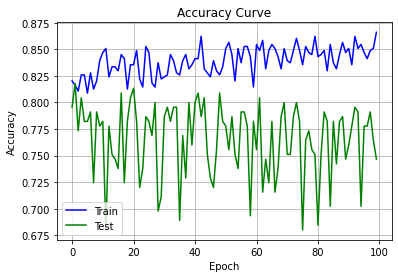

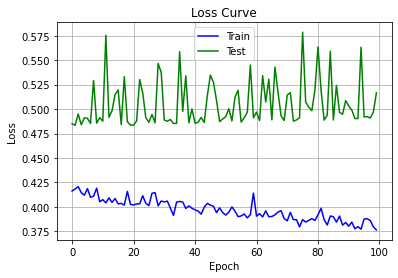

In [12]:
def getcurves(his):
    
    tracc=his['acc']
    trl=his['loss']
    teacc = his['val_acc']
    tel = his['val_loss']
    
    plt.plot(tracc,color='blue')
    plt.plot(teacc,color='green')
    plt.title('Accuracy Curve')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.grid()
    plt.show()
    
    plt.plot(trl,color='blue')
    plt.plot(tel,color='green')
    plt.title('Loss Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.grid()
    plt.show()

getcurves(hist)